In [2]:
%pip install pmdarima;

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 16.6MB/s 
     |████████████████████████████████| 8.7MB 28.6MB/s 
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [101]:
#Check Version
import statsmodels._version
if statsmodels._version.get_versions()['version'] != '0.11.1':
  !pip install --upgrade statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS' # Month Start

df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D' # Month Start
df2 = df2[:120]

df3 = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
df3.index.freq = 'MS'

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [4]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults


In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#**ARMA**

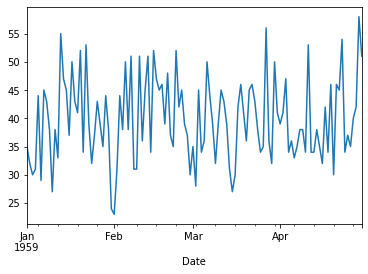

In [6]:
df2['Births'].plot()

### Function for running the augmented Dickey-Fuller test
Since we'll use it frequently in the upcoming forecasts, let's define a function we can copy into future notebooks for running the augmented Dickey-Fuller test. Remember that we'll still have to import <tt>adfuller</tt> at the top of our notebook.

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    print('\nResult:')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00

Result:
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


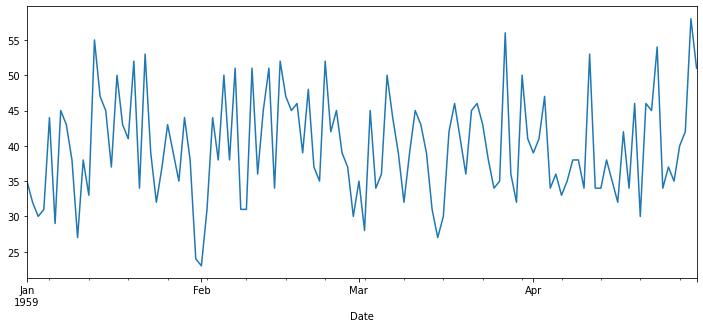

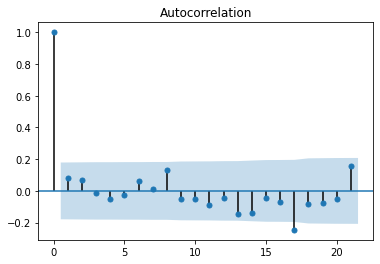

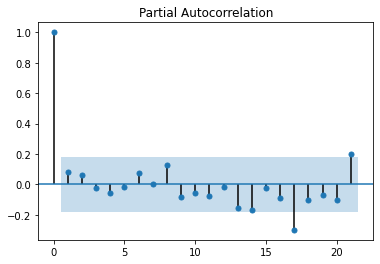

In [9]:
plot_acf(df2['Births'])
plot_pacf(df2['Births']);

In [93]:
from pmdarima import auto_arima

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1959-01-01 to 1959-04-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  120 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [104]:
auto_arima(df2['Births'],maxiter=10000,method='nm',trace=True,random_state=403).summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=829.481, BIC=846.206, Time=0.874 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=823.489, BIC=829.064, Time=0.051 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=824.647, BIC=833.010, Time=0.092 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=824.747, BIC=833.110, Time=0.114 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=1230.607, BIC=1233.395, Time=0.026 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=826.399, BIC=837.549, Time=0.363 seconds
Total fit time: 1.528 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Mon, 29 Jun 2020   AIC                            823.489
Time:                        03:14:03   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`

In [13]:
#train test split
train = df2.iloc[:90]
test = df2.iloc[90:]

In [14]:
model = ARMA(train['Births'],order = (2,2)).fit()

In [15]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Mon, 29 Jun 2020   AIC                            627.809
Time:                        02:18:17   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.608      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.67

In [16]:
start = len(train)
end = len(train) + len(test) - 1

In [17]:
prediction2 = model.predict(start,end).rename('ARMA(2,2) Predictions')

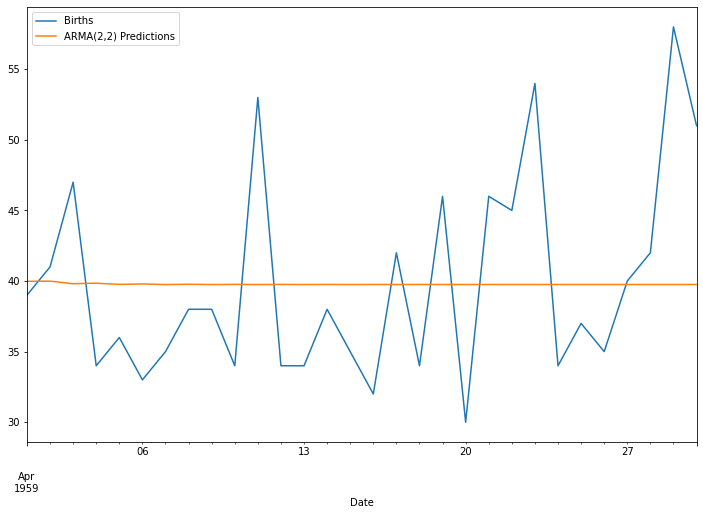

In [18]:
test.plot(legend = True,figsize=(12,8))
prediction2.plot(legend = True)


In [19]:
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)#trace will show the grid search

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=823.489, BIC=829.064, Time=0.012 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=824.647, BIC=833.010, Time=0.117 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=824.747, BIC=833.110, Time=0.056 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=1230.607, BIC=1233.395, Time=0.007 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=826.399, BIC=837.549, Time=0.304 seconds
Total fit time: 0.501 seconds


In [20]:
print(stepwise_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Mon, 29 Jun 2020   AIC                            823.489
Time:                        02:18:18   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
Ljung-Box (Q):                       44.41   Jarque-

#ARIMA

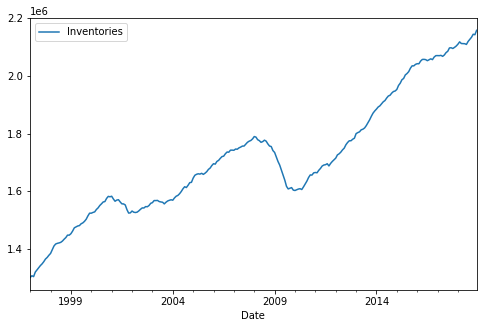

In [54]:
df3.plot(figsize=(8,5))

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

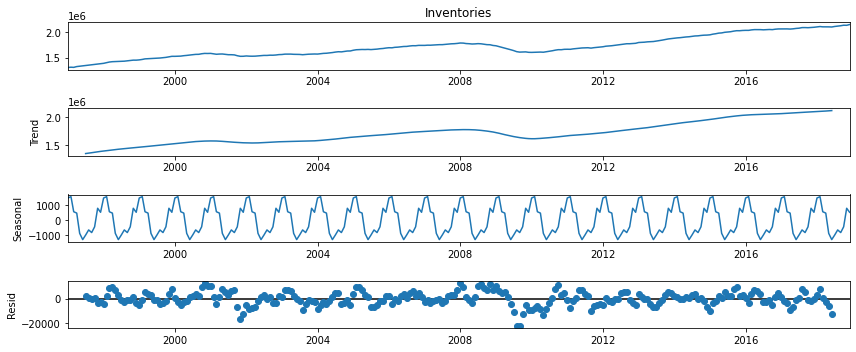

In [52]:
result = seasonal_decompose(df3['Inventories'],model='add')

from pylab import rcParams
rcParams['figure.figsize']  = 12, 5

result.plot();

In [105]:
print(auto_arima(df3['Inventories'],seasonal=False,start_p=1,start_q=1,maxiter=10000,method='nm').summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2664.364
Date:                Mon, 29 Jun 2020   AIC                           5336.728
Time:                        03:14:53   BIC                           5351.017
Sample:                             0   HQIC                          5342.471
                                - 264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    182.6347    133.641      1.367      0.172     -79.297     444.567
ar.L1          0.9335      0.044     21.034      0.000       0.847       1.020
ma.L1         -0.9267      0.045    -20.438      0.0

In [ ]:
#Continue Here

In [106]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=1,max_p=4,max_q=4,seasonal=True,trace=True,m=12,method='nm',maxiter=10000)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=1022.207, BIC=1036.583, Time=4.213 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.111 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=1.070 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=1.682 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.053 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=1022.314, BIC=1033.815, Time=1.388 seconds
Fit ARIMA(0,1,1)x(2,1,1,12) [intercept=True]; AIC=1015.833, BIC=1033.084, Time=22.583 seconds
Near non-invertible roots for order (0, 1, 1)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,1)x(1,1,2,12) [intercept=True]; AIC=1014.930, BIC=1032.181, Time=18.070 seconds
Fit ARIMA(0,1,1)x(0,1,2,12) [intercept=True]; AIC=1

In [107]:
print(stepwise_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -499.125
Date:                            Mon, 29 Jun 2020   AIC                           1014.249
Time:                                    03:20:43   BIC                           1037.251
Sample:                                         0   HQIC                          1023.596
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0065      0.051      0.127      0.899      -0.094       0.107
ar.L1         -0.9159      0.077   